In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

label_to_text={'0':'angry','1':'disgust','2':'fear','3':'happy','4':'neutral','5':'sad','6':'surprise'}

In [154]:
final_model= tf.keras.models.load_model("Model4.h5")

In [58]:
##Testing on custom data

In [3]:
def preprocessInput(Image):
    image = cv2.imread(Image)
    image_gray =cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    #plt.imshow(image_gray)
    #Resize to input shape of our model
    resized = np.resize(image_gray,(1,48,48))
    #Scaling
    resized = resized/255
    #plt.imshow(resized)
    
    return resized
    

In [4]:
model_predicted = final_model.predict(preprocessInput('Test1.jpg'))
#print(model_predicted)

In [5]:
#Dictionary to encoding labels from ids
label_to_text={'0':'angry','1':'disgust','2':'fear','3':'happy','4':'neutral','5':'sad','6':'surprise'}

In [6]:
def predictions(predicted):
  for y in range(len(predicted)):
    y_list = list(predicted[y])
    for i in range(0,7):
        #print(i)
        if y_list[i]==max(y_list):
            #print(label_to_text['0'])
            print("Predicted_label is",label_to_text[str(i)],"\nEmotion_percentage is",round((y_list[i]*100),2),"%")
            

In [115]:
predictions(model_predicted)

Predicted_label is happy 
Emotion_percentage is 25.02 %


In [47]:
def HarCascade(Img):
  # Load the classifier and create a cascade object for face detection
  Image = cv2.imread(Img)
  face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
  faces = face_cascade.detectMultiScale(Image,1.1,4)
  for(x,y,w,h) in faces:
      cv2.rectangle(Image,(x,y),(x+w, y+w),(0,255,0),2)
  #plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  font = cv2.FONT_HERSHEY_SIMPLEX
  #cv2.putText(image,"face",(0,200),font,1,(0,255,0),2,cv2.LINE_4);
  
  predicted = final_model.predict(preprocessInput(Img))
  predictions(predicted)


  for y in range(len(predicted)):
    y_list = list(predicted[y])
    for i in range(0,7):
        #print(i)
        if y_list[i]==max(y_list):
  
          #print(label_to_text['0'])
          perc = int(round((y_list[i]*100),2))
          #print(perc)
          cv2.putText(Image,label_to_text[str(i)]+'='+str(perc)+'%',(0,200),font,1,(0,255,0),2,cv2.LINE_4);
  
  plt.imshow(cv2.cvtColor(Image, cv2.COLOR_BGR2RGB))

Predicted_label is happy 
Emotion_percentage is 25.02 %
25


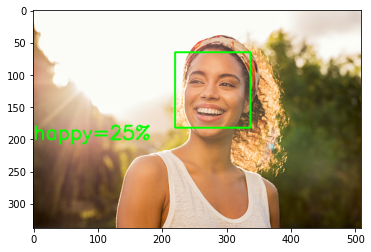

In [48]:
HarCascade('Test1.jpg')

Predicted_label is neutral 
Emotion_percentage is 35.22 %
35


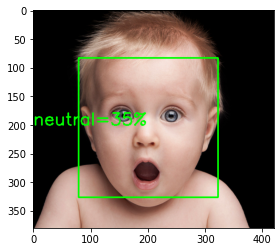

In [66]:
HarCascade('Test2.jpg')

Predicted_label is sad 
Emotion_percentage is 35.87 %
35


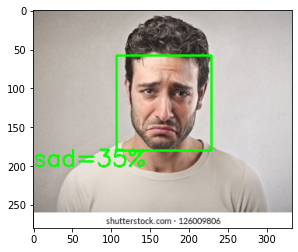

In [62]:
HarCascade('Test4.jpg')

Predicted_label is neutral 
Emotion_percentage is 26.14 %
26


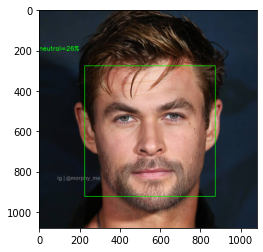

In [123]:
HarCascade('TestNew.jpg')

Predicted_label is happy 
Emotion_percentage is 92.29 %
92


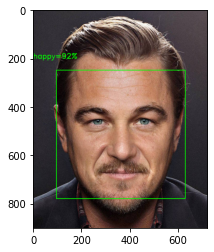

In [124]:
HarCascade('TestNew2.jpg')

Predicted_label is fear 
Emotion_percentage is 20.19 %
20


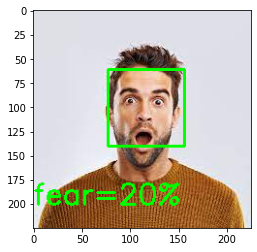

In [239]:
HarCascade('TestNew3.jpg')

##HELPER FUNCTIONS FOR WEBCAM IN COLAB

In [ ]:
#Reference:https://github.com/theAIGuysCode/colab-webcam

In [69]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [71]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [74]:
'''try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))'''

"try:\n  filename = take_photo('photo.jpg')\n  print('Saved to {}'.format(filename))\n  \n  # Show the image which was just taken.\n  display(Image(filename))\nexcept Exception as err:\n  # Errors will be thrown if the user does not have a webcam or if they do not\n  # grant the page permission to access it.\n  print(str(err))"

In [75]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [89]:
import os
import cv2

##Predicting Emotions from Video

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])
   

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    #plt.imshow(gray)
    resized = np.resize(gray,(1,48,48))
    #Scaling
    resized = resized/255

    #final_model.predict(resized)
    predicted = final_model.predict(resized)
    #print(predicted)
    #print("maxm",max(predicted[0]))
    #font=cv2.FONT_HERSHEY_SIMPLEX
    

    for y in range(len(predicted)):
      y_list = list(predicted[y])
      for i in range(0,7):
          #print(i)
          if y_list[i]==max(y_list):
    
            #print(label_to_text['0'])
            perc = int(round((y_list[i]*100),2))
            
            #print("Predicted_label is",label_to_text[str(i)],"\nEmotion_percentage is",round((y_list[i]*100),2),"%")

            #print(perc)
            #cv2.putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]])
            
            cv2.putText(bbox_array,label_to_text[str(i)]+'='+str(perc)+'%',(0,200),font,1,(0,255,0),2,cv2.LINE_4);
    
    #plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)


    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes
    #label_to_text={'0':'angry','1':'disgust','2':'fear','3':'happy','4':'neutral','5':'sad','6':'surprise'}

<IPython.core.display.Javascript object>